#### Diabetes Dataset to Predict whether a Person is diabetic or not.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
header = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DPFunction','Age','Outcome']
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/pima_indian_diabetes.csv', 
                     header = None, 
                     skiprows= 1, 
                     names = header) 
diabetes_df                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


This dataset has not any header so, we use header. Now, dataset looks good.

In [3]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes_df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
742,9,140,94,0,0,32.7,0.734,45,1


In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
diabetes_df.shape

(767, 9)

In [7]:
diabetes_df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPFunction       0
Age              0
Outcome          0
dtype: int64

### Data Processing

In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Describe function: This function shows different statistical values like mean, standard deviation, and percentile of each numerical columns. Percectile means the data which are below give percentile.

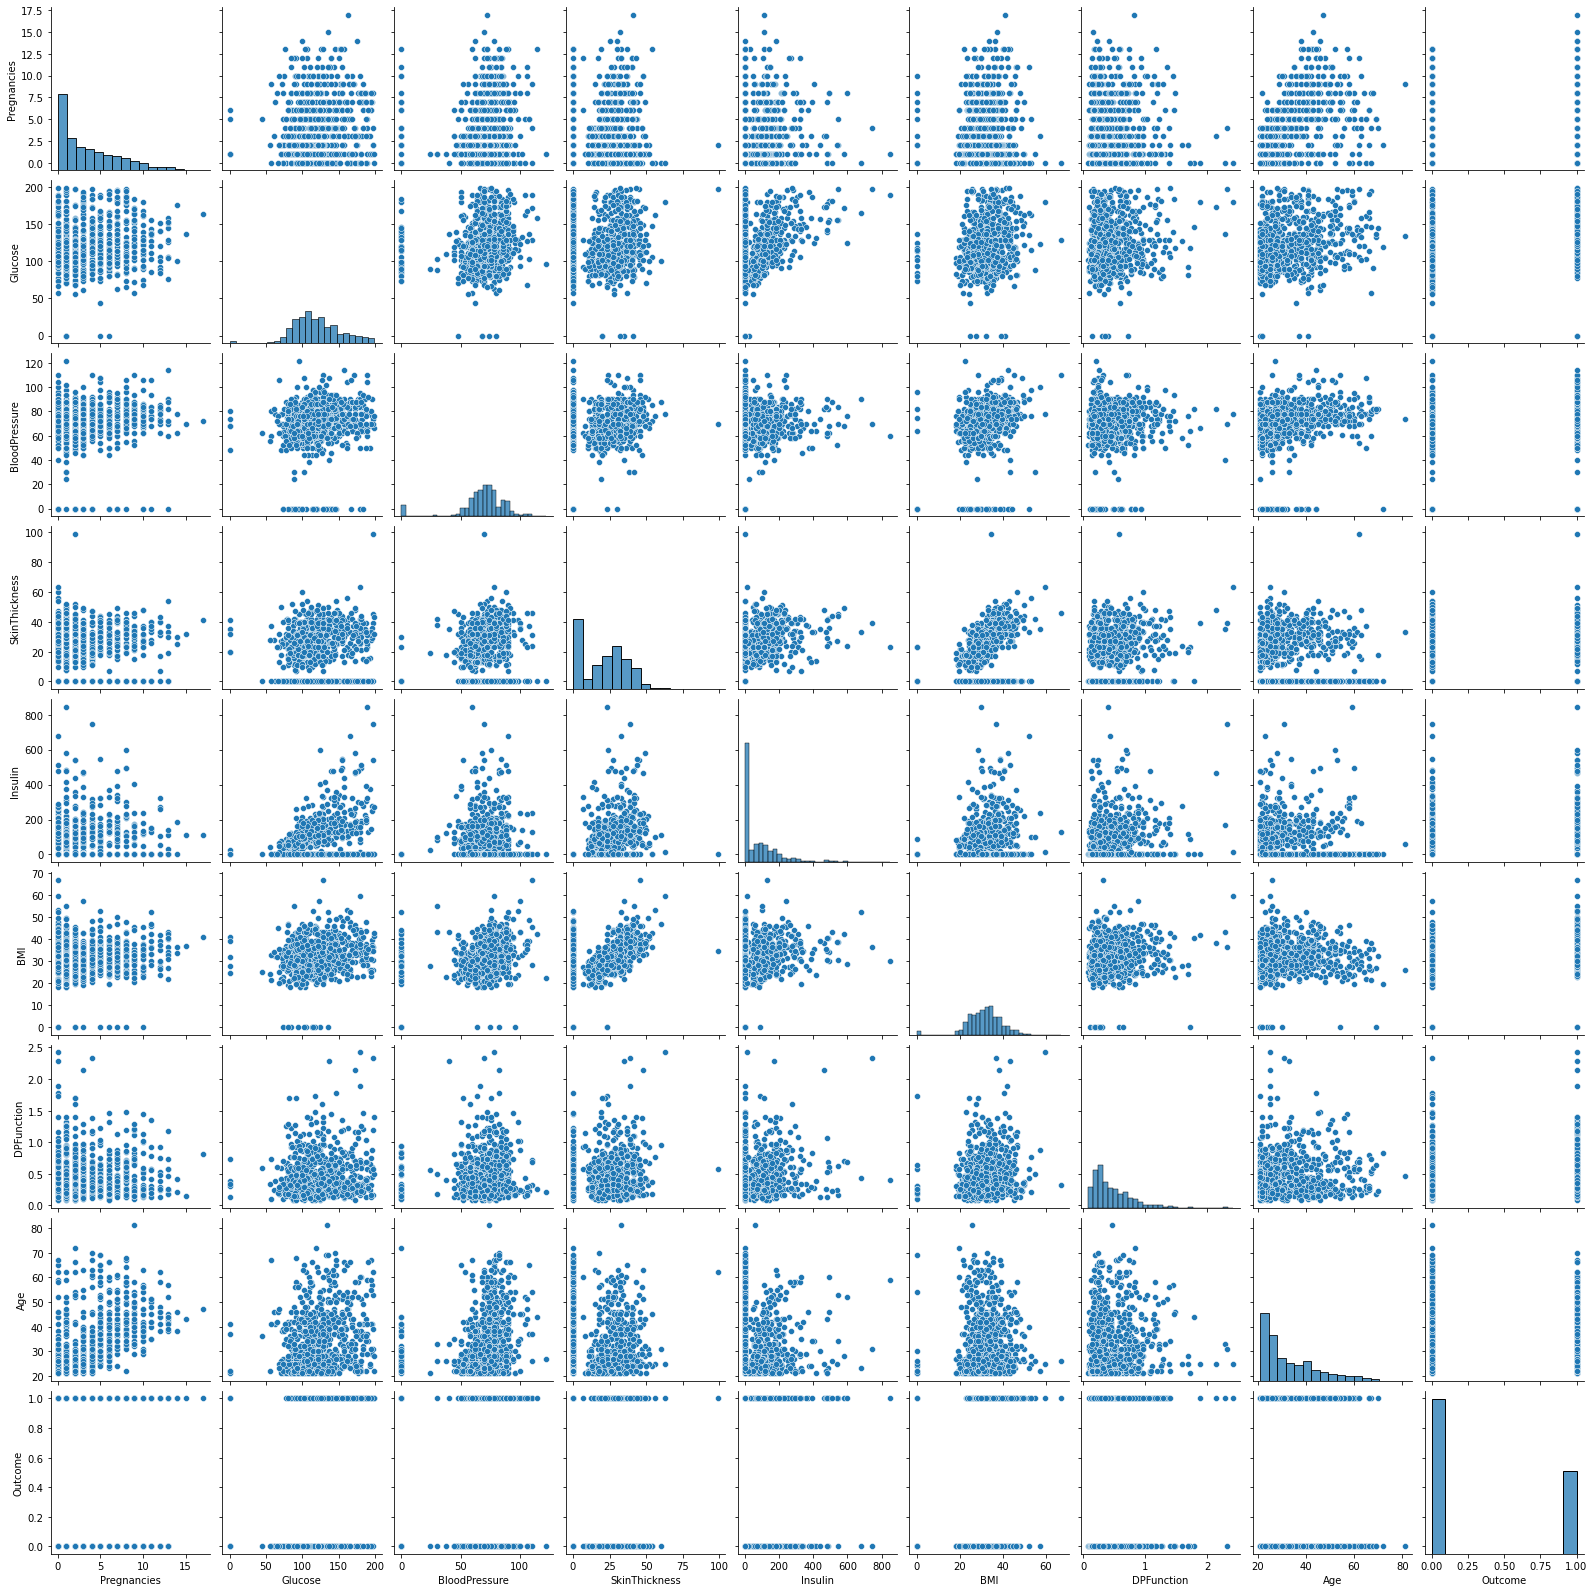

In [9]:
sns.pairplot(diabetes_df);

Pair Plot: This visualization method is coming from Seaborn. Here, by this we visualize the relation of each column with different columns separately. 

### Correlation

In [10]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age,Outcome
Pregnancies,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodPressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DPFunction,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [11]:
diabetes_df['Outcome'].value_counts()

0    500
1    267
Name: Outcome, dtype: int64

We use this as:
Non-Diabetic = 0,
Diabetic = 1

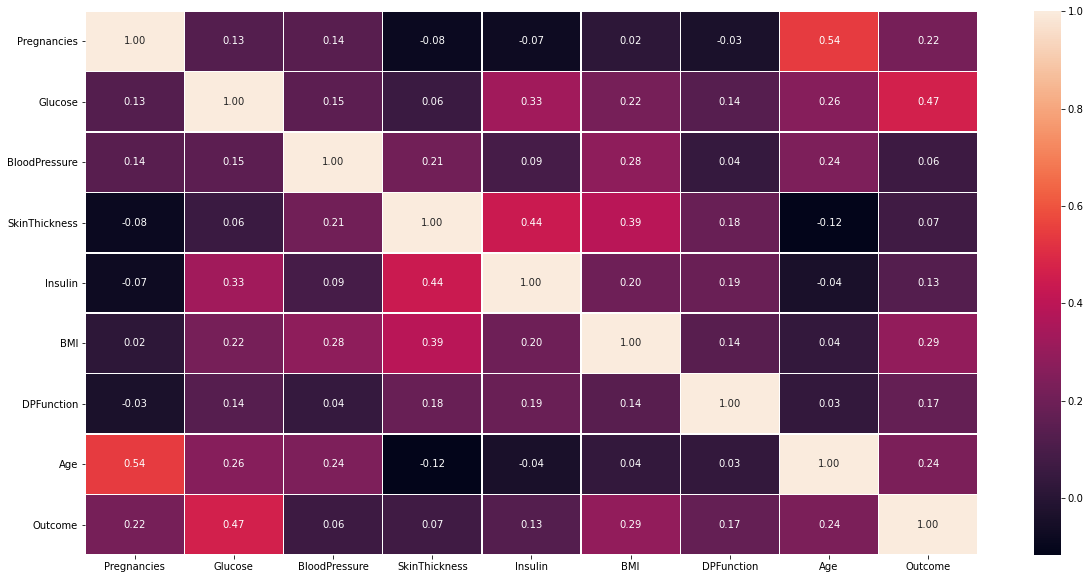

In [12]:
plt.figure(figsize = (20, 10))
sns.heatmap(diabetes_df.corr(), annot = True, linewidths = 0.5, linecolor = 'white', fmt = '.2f');

In [13]:
diabetes_df.groupby('Outcome').mean().T

Outcome,0,1
Pregnancies,3.298000,4.861423
Glucose,109.980000,141.232210
BloodPressure,68.184000,70.820225
SkinThickness,19.664000,22.116105
Insulin,68.792000,100.711610
BMI,30.304200,35.148315
DPFunction,0.429734,0.550213
Age,31.190000,37.018727


### Split the data and labels

In [14]:
X = diabetes_df.drop(columns = 'Outcome', axis = 1)
Y = diabetes_df['Outcome']

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [16]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: Outcome, Length: 767, dtype: int64

### Data Standardization

##### StandardScaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1.

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.84372629 -1.12208597 -0.16024856 ... -0.68372895 -0.36426474
  -0.18894038]
 [ 1.23423997  1.94447577 -0.26357823 ... -1.10230105  0.60470064
  -0.1037951 ]
 [-0.84372629 -0.99692019 -0.16024856 ... -0.49346891 -0.91968415
  -1.0403932 ]
 ...
 [ 0.343683    0.0044061   0.14974046 ... -0.73446496 -0.68423462
  -0.27408566]
 [-0.84372629  0.16086333 -0.47023757 ... -0.23978884 -0.37030191
   1.17338414]
 [-0.84372629 -0.8717544   0.04641078 ... -0.20173684 -0.47293375
  -0.87010264]]


In [20]:
X = standardized_data
Y = diabetes_df['Outcome']

In [21]:
print(X)
print(Y)

[[-0.84372629 -1.12208597 -0.16024856 ... -0.68372895 -0.36426474
  -0.18894038]
 [ 1.23423997  1.94447577 -0.26357823 ... -1.10230105  0.60470064
  -0.1037951 ]
 [-0.84372629 -0.99692019 -0.16024856 ... -0.49346891 -0.91968415
  -1.0403932 ]
 ...
 [ 0.343683    0.0044061   0.14974046 ... -0.73446496 -0.68423462
  -0.27408566]
 [-0.84372629  0.16086333 -0.47023757 ... -0.23978884 -0.37030191
   1.17338414]
 [-0.84372629 -0.8717544   0.04641078 ... -0.20173684 -0.47293375
  -0.87010264]]
0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: Outcome, Length: 767, dtype: int64


### Train Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(767, 8) (613, 8) (154, 8)


Here, we see the data shape, X train data and X test data shape.

### Training the Model

In [24]:
classifier = svm.SVC(kernel = 'linear')

In [25]:
#Training the SVC machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation 

#### Accuracy Score

In [26]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy score of the training data = ', training_data_accuracy)

Accuracy score of the training data =  0.7830342577487766


In [28]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy score of the test data = ', test_data_accuracy)

Accuracy score of the test data =  0.7857142857142857


Here, we see our accuracy is very good. Both training accuracy and test accuracy is very good.

### Making a Predictive System

In [30]:
input_data = (4,110,92,0,0,37.6,0.191,30)   # Result = 0

# Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print('Prediction of value:',prediction)
print('*' * 50)

if prediction[0] == 0:
    print('The person is not diabetic.')
else:
    print('The person is diabetic.')

[[ 0.04683068 -0.33979981  1.18303717 -1.28688187 -0.69355921  0.71151138
  -0.84723814 -0.27408566]]
Prediction of value: [0]
**************************************************
The person is not diabetic.


In [31]:
# Example:
input_data = (1,189,60,23,846,30.1,0.398,59)   # Result = 1

# Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print('Prediction of value:',prediction)
print('*' * 50)

if prediction[0] == 0:
    print('The person is not diabetic.')
else:
    print('The person is diabetic.')

[[-0.84372629  2.13222445 -0.47023757  0.15569823  6.64968539 -0.23978884
  -0.2223913   2.19512753]]
Prediction of value: [1]
**************************************************
The person is diabetic.


Here, we see our prediction code shows exactaly the same result which into the dataset.